In [304]:
import random
import time
import math
from scipy.stats import rv_discrete
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import six
import sys
sys.modules['sklearn.externals.six'] = six
import mlrose
from itertools import combinations
from collections import Counter
from mlrose_hiive.runners import MIMICRunner
from mlrose_hiive.generators import TSPGenerator

##### Problem 1: Suppose we want to find the binary string of length 10 that maximizes the number of 1's. In other words, we want to find the binary string x that maximizes the objective function f(x) = number of 1's in x. The solution space for this problem consists of 2^10 = 1024 possible binary strings of length 10.

In [579]:
# Define the objective function
def f(x):
    return sum([int(xi) for xi in x])

In [580]:
# Define the length of the binary string
n = 10
# Define the initial solution
x = ''.join([str(random.randint(0,1)) for i in range(n)])
max_f = f(x)

In [581]:
x

'1111001011'

In [582]:
f(x)

7

##### Solve by Randomized Hill Climbing

###### Advantage of RHC: One advantage of RHC in this problem is that the search space is relatively small, which means that the algorithm is likely to find the optimal solution quickly. The randomization in RHC also allows the algorithm to explore different parts of the search space and potentially avoid getting stuck in local optima.

The number of iteration it takes to achieve the maximum value: 21
Total time: 0.004495143890380859
Average time per iteration: 4.495143890380859e-06
Maximum value of f(x) found by RHC: 10
Solution that achieves the maximum value is 1111111111


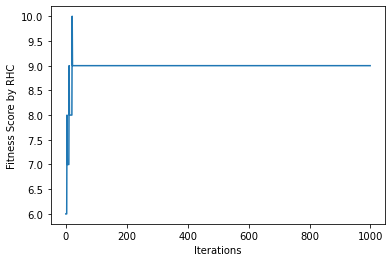

In [583]:
# Define th enumber of iterations
iterations = 1000
num_run = 0

# Main loop
start_time = time.time()
fitness_hist = []
for i in range(iterations):
    # Genereate a new candidate solution
    x_new = list(x)
    j = random.randint(0, n-1)
    x_new[j] = '0' if x_new[j] == '1' else '1'
    x_new = ''.join(x_new)
    
    # Calculate the value of the objective function for the new solution
    f_new = f(x_new)
    
    # Check if the new solution is better than the current solution
    if f_new > max_f:
        max_f = f_new
        x = x_new
    # Calculate the number of iterations so far
    num_run += 1
    #if max_f == 10:
        #break
    fitness_hist.append(f_new)
end_time = time.time()

plt.plot(range(iterations), fitness_hist)
plt.xlabel('Iterations')
plt.ylabel('Fitness Score by RHC')
    

# Print the maximum value of the objective function and the corresppoinding solution
print("The number of iteration it takes to achieve the maximum value:", np.argmax(fitness_hist))
print("Total time:", (end_time - start_time))
print("Average time per iteration:", (end_time - start_time)/num_run)
print("Maximum value of f(x) found by RHC:", max_f)
print("Solution that achieves the maximum value is", x)


##### Solve by Simulated Annealing

The number of iteration it takes to achieve the maximum value: 33
Total time: 0.6653602123260498
Average time per iteration: 0.0006653602123260498
Maximum value of f(x) found by Simulated Annealing: 10
Solution that achieves the maximum value is 1111111111


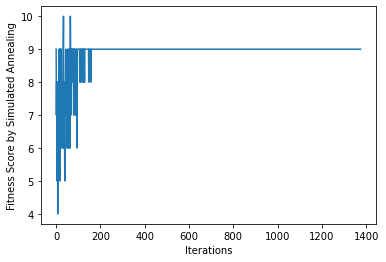

In [546]:
# Define the initial temprature and cooling rate
T = 1.0
cooling_rate = 0.01

#Define the number of iterations at each temperature
iterations = 100


# Main loop
start_time = time.time()
fitness_hist = []
while T > 1e-6:
    for i in range(iterations):
        # Generate a new condidate solution
        x_new = list(x)
        j = random.randint(0, n-1)
        x_new[j] = '0' if x_new[j] == '1' else '1'
        x_new = ''.join(x_new)
        
        # Calculate the value of the objective function for the new solution
        f_new = f(x_new)
        
        # Calculate the acceptance probability
        delta_f = f_new - max_f
        acceptance_prob = math.exp(delta_f / T)
        
        # Check if the new solution is better than the current solution
        if f_new > max_f or random.uniform(0,1) < acceptance_prob:
            max_f = f_new
            x = x_new
            
        # Calculate the number of iterations so far
        #num_run += 1
        #if max_f == 10:
            #break
    
    # Reduce the temperature
    T *= 1 - cooling_rate
    fitness_hist.append(f_new)
end_time = time.time()

plt.plot(range(len(fitness_hist)), fitness_hist)
plt.xlabel('Iterations')
plt.ylabel('Fitness Score by Simulated Annealing')
# Print the maximum value of the objective function and the corresppoinding solution
print("The number of iteration it takes to achieve the maximum value:", np.argmax(fitness_hist))
print("Total time:", (end_time - start_time))
print("Average time per iteration:", (end_time - start_time)/num_run)
print("Maximum value of f(x) found by Simulated Annealing:", max_f)
print("Solution that achieves the maximum value is", x)

##### Solve by Genetic Algorithm

The number of iteration it takes to achieve the maximum value: 26
Total time: 0.08080005645751953
Average time per iteration: 0.0008080005645751953
Maximum value of f(x) found by Genetic Algorithm: 10
Solution that achieves the maximum value is 1111111111


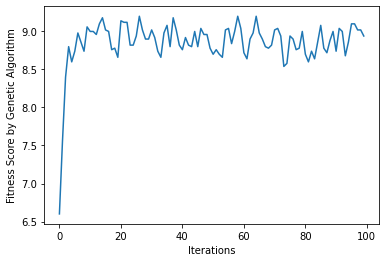

In [555]:
# Define the length of the binary string
n = 10

# Define the population size and the number of generations
pop_size = 50
num_generations = 100

# Define the mutation rate
mutation_rate = 0.1

# Define the initial population
population = [''.join([str(random.randint(0,1)) for i in range(n)]) for j in range(pop_size)]
num_run = 0
# Main loop
start_time = time.time()
fitness_hist = []
for gen in range(num_generations):
    # Evaluate the fitness of each indiviual in the population
    fitness = [f(x) for x in population]
    
    # Select the parents for the next generation using tournament selection
    parents = []
    for i in range(pop_size):
        tournament = random.sample(range(pop_size),5)
        tournament_fitness = [fitness[j] for j in tournament]
        winner = tournament[tournament_fitness.index(max(tournament_fitness))]
        parents.append(population[winner])
        
    # Generate the offspring for the next generation using crossover and mutation
    offspring = []
    for i in range(pop_size):
        parent1 = parents[random.randint(0, pop_size-1)]
        parent2 = parents[random.randint(0, pop_size-1)]
        crossover_point = random.randint(0, n-1)
        child = parent1[:crossover_point] + parent2[crossover_point:]
        # At each gene level, introduce randomness
        for j in range(n):
            if random.uniform(0,1) < mutation_rate:
                child = child[:j] + ('0' if child[j] == '1' else '1') + child[j+1:]
        offspring.append(child)
    # Replace the old popylation with the new offspring
    population = offspring

    # Evaluate the fitness of the final population and print the maximum value
    fitness = [f(x) for x in population]
    max_f = max(fitness)
    max_x = population[fitness.index(max_f)]
    # Calculate the number of iterations so far
    #num_run += 1
    #if max_f == 10:
        #break
    fitness_hist.append(np.mean(fitness))
end_time = time.time()

plt.plot(range(len(fitness_hist)), fitness_hist)
plt.xlabel('Iterations')
plt.ylabel('Fitness Score by Genetic Algorithm')
    
print("The number of iteration it takes to achieve the maximum value:", np.argmax(fitness_hist) )
print("Total time:", (end_time - start_time))
print("Average time per iteration:", (end_time - start_time)/len(fitness_hist))
print("Maximum value of f(x) found by Genetic Algorithm:", max_f)
print("Solution that achieves the maximum value is", x)
                
        

##### Solve by MIMIC

In [556]:

# Define MIMIC function
def MIMIC(pop_size, keep_pct, max_attempts, max_iters):
    # Initialize population
    population = [''.join([str(random.randint(0,1)) for i in range(10)]) for j in range(pop_size)]
    fitness_hist = []
    start_time = time.time()
    
    # Initialize best state and fitness
    best_state = None
    best_fitness = -1
    
    # Begin MIMIC algorithm
    for i in range(max_iters):
        # Evaluate fitness of population
        current_fitness = [f(x) for x in population]
        
        # Update best state and fitness
        max_index = np.argmax(current_fitness)
        if current_fitness[max_index] > best_fitness:
            best_state = population[max_index]
            best_fitness = current_fitness[max_index]
            
        # Select top percentage of samples to keep
        num_to_keep = int(pop_size*keep_pct)
        sorted_indices = list(np.argsort(current_fitness)[::-1])
        kept_samples = np.array(population)[sorted_indices[:num_to_keep]]
        
        
        # Update probability distribution
        probs = np.mean(np.array([[int(bit) for bit in s] for s in kept_samples]), axis = 0)
        
        # Generate 
        new_samples = []
        for i in range(pop_size - num_to_keep):
            new_samples.append(''.join(x for x in list(['1' if random.random() < p else '0' for p in probs])))

        
        # Combine new and kept_samples
        population = np.concatenate((kept_samples,new_samples))
        
        fitness_hist.append(np.mean(current_fitness))
    
    end_time = time.time()
    
    plt.plot(range(max_iters), fitness_hist)
    plt.xlabel("iteration")
    plt.ylabel("mean of fitness score")
    plt.show()
    #print(fitness_hist)
    print("The number of iteration it takes to achieve the maximum value:", np.argmax(fitness_hist))
    print("Total time:", (end_time - start_time))
    print("Average time per iteration:", (end_time - start_time)/max_iters)
    print("Maximum value of f(x) found by MIMIC:", best_fitness)
    print("Solution that achieves the maximum value is", best_state)

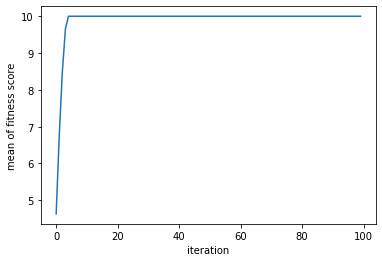

The number of iteration it takes to achieve the maximum value: 4
Total time: 0.08516287803649902
Average time per iteration: 0.0008516287803649902
Maximum value of f(x) found by MIMIC: 10
Solution that achieves the maximum value is 1111111111


In [557]:
MIMIC(pop_size=100, keep_pct=0.2, max_attempts=10, max_iters=100)

##### Problem 2: Suppose we have a game board that consists of a 5x5 grid of squares. Each square is either black or white. We want to find the arrangement of colors that maximizes the number of pairs of adjacent squares that have the same color.

We can represent each possible arrangement of black and white squares as a binary string of length 25, where a "1" represents a black square and a "0" represents a white square. We can assign a fitness score to each arrangement by counting the number of pairs of adjacent squares that have the same color.

##### Solve problem 2 by simulated annealing

In [591]:
# Define the fitness function
def fitness(state):
    board = state.reshape((5,5))
    pairs = 0
    for i in range(5):
        for j in range(5):
            if j < 4 and board[i,j] == board[i,j+1]:
                pairs += 1
            if i < 4 and board[i,j] == board[i+1,j]:
                pairs += 1
    return pairs

# Define the simulated annealing algorithm
def simulated_annealing(fitness, n_iterations, T_init, T_decay):
    
    # Generate an initial random solution
    current_solution = np.random.randint(2, size=25)
    current_fitness = fitness(current_solution)
    
    # Set the initial temperature
    T = T_init
    start_time = time.time()
    fitness_hist = [current_fitness]
    # Run the simulated annealing algorithm
    for i in range(n_iterations):
        # Choose a random neighbor
        neighbor = current_solution.copy()
        index = random.randint(0,24) # randomly choose one square to flip the color
        neighbor[index] = 1 - neighbor[index] # Flip the color of the chosen square
        neighbor_fitness = fitness(neighbor)
        
        # If the new solution is better, accept it
        if neighbor_fitness > current_fitness:
            current_solution = neighbor
            current_fitness = neighbor_fitness
        # Otherwise, accept the new solution a a certain probability determined by the annealing schedule
        else:
            delta = neighbor_fitness - current_fitness
            p_accept = np.exp(delta / T)
            if random.random() < p_accept:
                current_solution = neighbor
                current_fitness = neighbor_fitness
        # Decay the temperature
        T *= T_decay
        fitness_hist.append(current_fitness)
    end_time = time.time()
   
    
    plt.plot(range(n_iterations+1), fitness_hist)
    plt.xlabel("iteration")
    plt.ylabel("fitness score")
    plt.show()
    print("The number of iteration it takes to achieve the maximum value:", np.argmax(fitness_hist))
    print("Total time:", (end_time - start_time))
    print("Average time per iteration:", (end_time - start_time)/n_iterations)
    print("Maximum value of f(x) found by Simulated Annealing:", max(fitness_hist))
    print("Solution that achieves the maximum value is", current_solution)
                
 

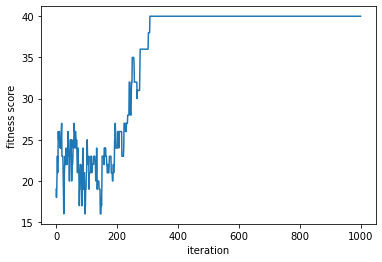

The number of iteration it takes to achieve the maximum value: 308
Total time: 0.0457308292388916
Average time per iteration: 4.57308292388916e-05
Maximum value of f(x) found by Simulated Annealing: 40
Solution that achieves the maximum value is [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [592]:
simulated_annealing(fitness, n_iterations=1000,T_init=10, T_decay=0.99)

##### Solve problem 2 by Randomized Hill Climbing

In [593]:
# Define the Randomized Hill Climbing algorithm
def RHC(n_iterations):
    # Generate a random initial solution
    current_solution = np.random.randint(2, size=25)
    current_fitness = fitness(current_solution)
    
    start_time = time.time()
    fitness_hist = [current_fitness]
    for i in range(n_iterations):
        # Generate a new neighbor solution
        neighbor = current_solution.copy()
        index = random.randint(0,24)
        neighbor[index] = 1 - neighbor[index]
        neighbor_fitness = fitness(neighbor)
        
        if neighbor_fitness > current_fitness:
            current_solution = neighbor
            
        current_fitness = fitness(current_solution)
        fitness_hist.append(current_fitness)

           
    end_time = time.time()
    
    plt.plot(range(n_iterations+1), fitness_hist)
    plt.xlabel("iteration")
    plt.ylabel("fitness score")
    plt.show()
    print("The number of iteration it takes to achieve the maximum value:", np.argmax(fitness_hist))
    print("Total time:", (end_time - start_time))
    print("Average time per iteration:", (end_time - start_time)/n_iterations)
    print("Maximum value of f(x) found by RHC:", max(fitness_hist))
    print("Solution that achieves the maximum value is", current_solution)
    

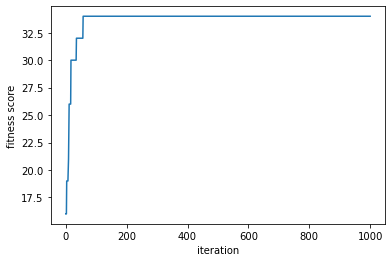

The number of iteration it takes to achieve the maximum value: 57
Total time: 0.06580901145935059
Average time per iteration: 6.580901145935059e-05
Maximum value of f(x) found by RHC: 34
Solution that achieves the maximum value is [1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 0 0 1 1 1 0 0]


In [594]:
RHC(n_iterations=1000)

##### Solve problem 2 by Genetic algorithm

In [595]:
def GA(population_size, n_iterations, mutation_prob):
    # Initialize the population
    population = [np.random.randint(2, size=25) for j in range(population_size)]
    fitness_hist = []
    start_time = time.time()
    for i in range(n_iterations):
        # Evaluate fitness
        current_fitness = [fitness(individual) for individual in population]
        
        # Select the fittest indiviuals for reproduction
        fittest_indices = sorted(range(len(current_fitness)), key=lambda k: current_fitness[k], reverse=True)
        fittest_population = [population[index] for index in fittest_indices[:int(population_size/2)]]
        
        # Create new individuals through crossover
        new_population = []
        while len(new_population) < population_size:
            parent1 = random.choice(fittest_population)
            parent2 = random.choice(fittest_population)
            crossover_index = random.randint(1, 24)
            child = list(parent1[:crossover_index]) + list(parent2[crossover_index:])
            child = np.array(child)
            new_population.append(child)
            
        # Mutate some individuals in the new population
        for j in range(population_size):
            for k in range(25):
                if random.random() < mutation_prob:
                    new_population[j][k] = 1 - new_population[j][k]
        
        # Replace the old population with the new population
        population = new_population
        
        fitness_hist.append(np.mean(current_fitness))
        
    # Return the best solution found
    final_fitness = [fitness(individual) for individual in population]
    #fitness_hist.append(np.mean(final_fitness))
    best_index = max(range(len(final_fitness)), key=final_fitness.__getitem__)
    best_fitness = final_fitness[best_index]
    best_solution = population[best_index]
    end_time = time.time()
    
    plt.plot(range(n_iterations), fitness_hist)
    plt.xlabel("iteration")
    plt.ylabel("mean of fitness score")
    plt.show()
    print("The number of iteration it takes to achieve the maximum value:", np.argmax(fitness_hist))
    print("Total time:", (end_time - start_time))
    print("Average time per iteration:", (end_time - start_time)/n_iterations)
    print("Maximum value of f(x) found by Genetic algorithm:", best_fitness)
    print("Solution that achieves the maximum value is", best_solution)

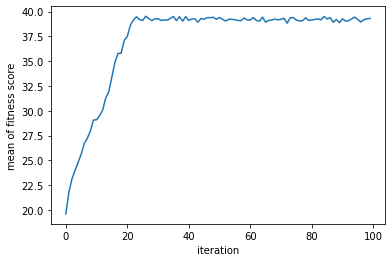

The number of iteration it takes to achieve the maximum value: 26
Total time: 0.236253023147583
Average time per iteration: 0.00236253023147583
Maximum value of f(x) found by Genetic algorithm: 40
Solution that achieves the maximum value is [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [596]:
GA(population_size=100, n_iterations=100, mutation_prob=0.01)

##### Solve problem 2 by MIMIC

In [597]:
import numpy as np
import random


# Define MIMIC function
def MIMIC(pop_size, keep_pct, max_attempts, max_iters):
    # Initialize population
    population = np.array([np.random.randint(2, size=25) for j in range(pop_size)])
    fitness_hist = []
    start_time = time.time()
    
    # Initialize best state and fitness
    best_state = None
    best_fitness = -1
    
    # Begin MIMIC algorithm
    for i in range(max_iters):
        # Evaluate fitness of population
        current_fitness = [fitness(individual) for individual in population]
        
        # Update best state and fitness
        max_index = np.argmax(current_fitness)
        if current_fitness[max_index] > best_fitness:
            best_state = population[max_index]
            best_fitness = current_fitness[max_index]
            
        # Select top percentage of samples to keep
        num_to_keep = int(pop_size*keep_pct)
        sorted_indices = np.argsort(current_fitness)[::-1]
        kept_samples = population[sorted_indices[:num_to_keep]]
        
        # Update probability distribution
        probs = np.mean(kept_samples, axis=0)
        
        # Generate 
        new_samples = np.zeros((pop_size-num_to_keep, 25), dtype=int)
        for i in range(num_to_keep, pop_size):
            new_samples[i-num_to_keep] = np.array([1 if random.random() < p else 0 for p in probs])
        
        # Combine new and kept_samples
        population = np.concatenate((kept_samples,new_samples))
        
        fitness_hist.append(np.mean(current_fitness))
    
    end_time = time.time()
    
    plt.plot(range(max_iters), fitness_hist)
    plt.xlabel("iteration")
    plt.ylabel("mean of fitness score")
    plt.show()
    print("The number of iteration it takes to achieve the maximum value:", np.argmax(fitness_hist))
    print("Total time:", (end_time - start_time))
    print("Average time per iteration:", (end_time - start_time)/max_iters)
    print("Maximum value of f(x) found by MIMIC:", best_fitness)
    print("Solution that achieves the maximum value is", best_state)

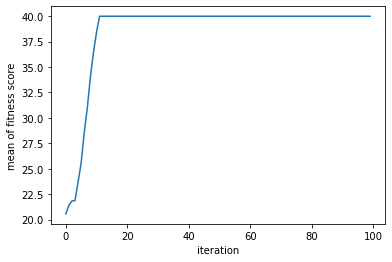

The number of iteration it takes to achieve the maximum value: 11
Total time: 0.21736502647399902
Average time per iteration: 0.0021736502647399904
Maximum value of f(x) found by MIMIC: 40
Solution that achieves the maximum value is [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [599]:
MIMIC(pop_size=100, keep_pct=0.2, max_attempts=10, max_iters=100)

##### Problem 3 : Traveling Salesman Problem (TSP)'s goal is to find the shortest possible route that visits a set of cities exactly once and returns to the starting city. Let's consider an example with 5 cities: A, B, C, D, and E.



##### Solve problem 3 by Random Hill Climbing

In [612]:
def create_distance_matrix(num_cities, seed=1):
    """Create a distance matrix for the TSP problem."""
    random.seed(seed)
    distance_matrix = np.zeros((num_cities, num_cities))
    for i in range(num_cities):
        for j in range(i+1, num_cities):
            distance_matrix[i][j] = random.randint(1, 10)
            distance_matrix[j][i] = distance_matrix[i][j]
    return distance_matrix

In [627]:
distance_matrix = create_distance_matrix(5, seed=1)

In [628]:
distance_matrix 

array([[ 0.,  3., 10.,  2.,  5.],
       [ 3.,  0.,  2.,  8.,  8.],
       [10.,  2.,  0.,  8.,  7.],
       [ 2.,  8.,  8.,  0.,  4.],
       [ 5.,  8.,  7.,  4.,  0.]])

In [629]:
def calculate_tsp_cost(solution, distance_matrix):
    """Calculates the total cost of a TSP solution."""
    cost = 0
    for i in range(len(solution)-1):
        cost += distance_matrix[solution[i]][solution[i+1]]
    cost += distance_matrix[solution[-1]][solution[0]]
    return cost

In [630]:
def tsp_random_hill_climb(distance_matrix, max_iterations):
    """Solves the Traveling Salesman Problem using randomized hill climbing."""
    num_cities = len(distance_matrix)
    # Randomly initialize a starting solution.
    current_solution = list(range(num_cities))
    random.shuffle(current_solution)
    current_cost = calculate_tsp_cost(current_solution, distance_matrix)
    cost_hist = [current_cost]
    start_time = time.time()
    for i in range(max_iterations):
        # Generate a random neighbor.
        neighbor = current_solution.copy()
        idx1 = random.randint(0, num_cities-1)
        idx2 = random.randint(0, num_cities-1)
        neighbor[idx1], neighbor[idx2] = neighbor[idx2], neighbor[idx1]
        neighbor_cost = calculate_tsp_cost(neighbor, distance_matrix)
        # If the neighbor has a better cost, move to it.
        if neighbor_cost < current_cost:
            current_solution = neighbor
            current_cost = neighbor_cost
            
        cost_hist.append(current_cost)
    end_time = time.time()
    
    plt.plot(range(max_iterations+1), cost_hist)
    plt.xlabel("iteration")
    plt.ylabel("Cost")
    plt.show()
    print("The number of iteration it takes to achieve the maximum value:", np.argmin(cost_hist))
    print("Total time:", (end_time - start_time))
    print("Average time per iteration:", (end_time - start_time)/max_iterations)
    print("Maximum value of f(x) found by random hill climbing:", current_cost)
    print("Solution that achieves the maximum value is", current_solution)



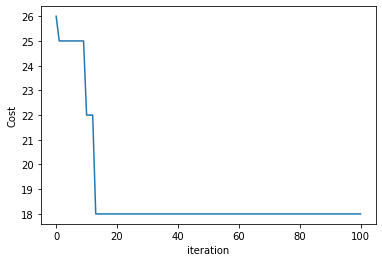

The number of iteration it takes to achieve the maximum value: 13
Total time: 0.0013942718505859375
Average time per iteration: 1.3942718505859374e-05
Maximum value of f(x) found by random hill climbing: 18.0
Solution that achieves the maximum value is [2, 4, 3, 0, 1]


In [631]:
tsp_random_hill_climb(distance_matrix, 100)

##### Solve problem 3 by Simulated Annealing

In [632]:
# Define the temperature and cooling rate
temperature = 1.0
cooling_rate = 0.99
num_cities = 5
n_iterations = 100
# Define the function to get a random neighbor
def get_random_neighbor(path):
    i = random.randint(0, len(path)-1)
    j = random.randint(0, len(path)-1)
    neighbor = path[:]
    neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
    return neighbor

# Define the simulated annealing function
def simulated_annealing(num_cities, temperature, cooling_rate, distance_matrix, n_iterations):
    # Randomly initialize a starting solution.

    init_state = list(range(num_cities))
    random.shuffle(init_state)
    current_state = init_state
    best_state = current_state
    start_time = time.time()
    cost_hist = []
    for i in range(n_iterations):
        neighbor = get_random_neighbor(current_state)
        current_energy = calculate_tsp_cost(current_state, distance_matrix)
        neighbor_energy = calculate_tsp_cost(neighbor, distance_matrix)
        if neighbor_energy < current_energy:
            current_state = neighbor
            if neighbor_energy < calculate_tsp_cost(best_state, distance_matrix):
                best_state = neighbor
        else:
            delta = neighbor_energy - current_energy
            acceptance_prob = math.exp(-delta/temperature)
            if random.random() < acceptance_prob:
                current_state = neighbor
        temperature *= cooling_rate
        
        cost_hist.append(current_energy)
     
    end_time = time.time()

    plt.plot(range(n_iterations), cost_hist)
    plt.xlabel("iteration")
    plt.ylabel("Cost")
    plt.show()
    print("The number of iteration it takes to achieve the maximum value:", np.argmin(cost_hist))
    print("Total time:", (end_time - start_time))
    print("Average time per iteration:", (end_time - start_time)/n_iterations)
    print("Maximum value of f(x) found by simulated annealing:", current_energy)
    print("Solution that achieves the maximum value is", current_state)


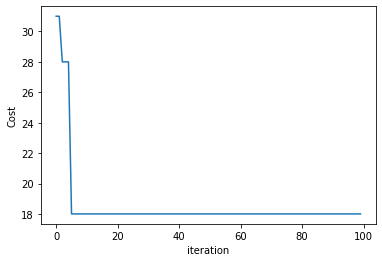

The number of iteration it takes to achieve the maximum value: 5
Total time: 0.0017349720001220703
Average time per iteration: 1.7349720001220702e-05
Maximum value of f(x) found by simulated annealing: 18.0
Solution that achieves the maximum value is [1, 2, 4, 3, 0]


In [633]:
simulated_annealing(num_cities, temperature, cooling_rate, distance_matrix, n_iterations)

##### Solve problem 3 by Generic algorithm

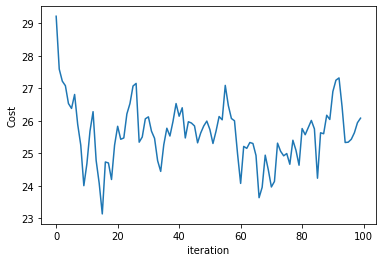

The number of iteration it takes to achieve the maximum value: 15
Total time: 0.21906089782714844
Average time per iteration: 0.0021906089782714844
Maximum value of f(x) found by simulated annealing: 18.0
Solution that achieves the maximum value is [3, 4, 2, 1, 0]


In [574]:
# Define the parameters for the generic algorithm
population_size = 100
mutation_rate = 0.1
generations = 100

# Define the fitness function for a given route
def fitness(route):
    total_distance = 0
    for i in range(num_cities):
        j = (i + 1) % num_cities
        total_distance += distance_matrix[route[i]][route[j]]
    return 1 / total_distance

# Generate an initial population of random routes
population = []
for i in range(population_size):
    population.append(random.sample(range(num_cities), num_cities))
start_time = time.time()
cost_hist = []
# Evolve the population over multiple generations
for generation in range(generations):
    # Evaluate the fitness of each individual in the population
    fitness_scores = [fitness(route) for route in population]
    distance = [1/fitness(route) for route in population]

    # Select parents for the next generation using roulette wheel selection
    parents = []
    for i in range(population_size):
        parent1 = random.choices(population, weights=fitness_scores)[0]
        parent2 = random.choices(population, weights=fitness_scores)[0]
        parents.append((parent1, parent2))

    # Create children through crossover and mutation
    children = []
    for parent1, parent2 in parents:
        child = parent1[:]
        for i in range(num_cities):
            if random.random() < mutation_rate:
                j = random.randint(0, num_cities - 1)
                child[i], child[j] = child[j], child[i]
        children.append(child)

    # Replace the population with the children
    population = children
    cost_hist.append(np.mean(distance))
end_time = time.time()
# Select the best individual from the final generation
best_route = max(population, key=fitness)
best_fitness = fitness(best_route)
shortest_distance = 1/best_fitness

plt.plot(range(generations), cost_hist)
plt.xlabel("iteration")
plt.ylabel("Cost")
plt.show()
print("The number of iteration it takes to achieve the maximum value:", np.argmin(cost_hist))
print("Total time:", (end_time - start_time))
print("Average time per iteration:", (end_time - start_time)/n_iterations)
print("Maximum value of f(x) found by simulated annealing:", shortest_distance)
print("Solution that achieves the maximum value is", best_route)



##### Solve problem 3 by MIMIC

In [267]:
distance_matrix

array([[ 0.,  3., 10.,  2.,  5.],
       [ 3.,  0.,  2.,  8.,  8.],
       [10.,  2.,  0.,  8.,  7.],
       [ 2.,  8.,  8.,  0.,  4.],
       [ 5.,  8.,  7.,  4.,  0.]])

In [577]:


class TSP:
    def __init__(self, distance_matrix):
        self.distance_matrix = distance_matrix
        self.num_cities = len(distance_matrix)

    def calculate_fitness(self, state):
        # Calculate the total distance of the route
        total_distance = 0
        for i in range(self.num_cities - 1):
            total_distance += self.distance_matrix[state[i], state[i+1]]
        total_distance += self.distance_matrix[state[self.num_cities-1], state[0]]
        # Fitness is the inverse of the total distance
        fitness = 1 / total_distance
        return fitness

    def generate_random_state(self):
        # Generate a random state (route)
        state = list(range(self.num_cities))
        random.shuffle(state)
        return state

    def get_neighbors(self, state):
        # Get all possible neighboring states by swapping two cities
        neighbors = []
        for i in range(self.num_cities - 1):
            for j in range(i+1, self.num_cities):
                neighbor = state.copy()
                neighbor[i], neighbor[j] = neighbor[j], neighbor[i]
                neighbors.append(neighbor)
        return neighbors


class MIMIC_TSP:
    def __init__(self, problem, population_size=100, keep_pct=0.2, max_attempts=10, max_iters=100):
        self.problem = problem
        self.population_size = population_size
        self.keep_pct = keep_pct
        self.max_attempts = max_attempts
        self.max_iters = max_iters

    def solve(self):
        # Initialize population
        population = [self.problem.generate_random_state() for i in range(self.population_size)]
        best_fitness = float('-inf')
        best_state = None
        start_time = time.time()
        cost_hist = []
        for i in range(self.max_iters):
            # Calculate fitness values for each member of the population
            fitness_vals = [self.problem.calculate_fitness(state) for state in population]
            
            # Keep only the top percentage of the population
            num_keep = int(self.population_size * self.keep_pct)
            elite_population = [population[i] for i in np.argsort(fitness_vals)[-num_keep:]]
            
            # Create a probability distribution over the elite population
            elite_probs = np.array([self.problem.calculate_fitness(state) for state in elite_population])
            elite_probs /= elite_probs.sum()

            # Generate a new population from the probability distribution
            new_member_idx = np.random.choice(len(elite_population), self.population_size, p=elite_probs)
            new_population = np.array(elite_population)[list(new_member_idx)]
            # Replace the old population with the new one
            population = new_population
            
            # Check for convergence
            best_member = max(population, key=lambda x: self.problem.calculate_fitness(x))
            best_member_fitness = self.problem.calculate_fitness(best_member)
            if best_member_fitness > best_fitness:
                best_fitness = best_member_fitness
                best_state = best_member
                
            cost_hist.append(1/np.mean(fitness_vals))
        end_time = time.time()
        plt.plot(range(self.max_iters), cost_hist)
        plt.xlabel("iteration")
        plt.ylabel("Cost")
        plt.show()
        print("The number of iteration it takes to achieve the maximum value:", np.argmin(cost_hist))
        print("Total time:", (end_time - start_time))
        print("Average time per iteration:", (end_time - start_time)/n_iterations)
        print("Maximum value of f(x) found by MIMIC:", 1/best_fitness)
        print("Solution that achieves the maximum value is", best_state)
     
       


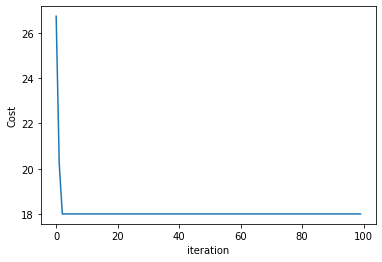

The number of iteration it takes to achieve the maximum value: 2
Total time: 0.09927487373352051
Average time per iteration: 0.0009927487373352052
Maximum value of f(x) found by MIMIC: 18.0
Solution that achieves the maximum value is [2 1 0 3 4]


In [578]:
TSP_obj = TSP(distance_matrix)
mimic_obj = MIMIC_TSP(TSP_obj,100, 0.2, 10, 100)
mimic_obj.solve()

In [485]:
import os
os.getcwd()

'/Users/shangwenhuang/Documents/omscs_ML/Assignment2'

In [498]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split

data = pd.read_csv("/Users/shangwenhuang/Documents/omscs_ML/Assignment1/data/Loan_prediction_dataset/train_loan_prediction.csv")

X = data[["Gender", "Married", "Dependents", "Education", "Self_Employed", "ApplicantIncome"
            ,"CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History", "Property_Area"]]
Y = np.where(data["Loan_Status"]=="Y", 1, 0)
X = pd.get_dummies(X, columns = ['Gender','Married','Dependents','Education','Property_Area','Self_Employed'])
X.fillna(0, inplace = True)
X = preprocessing.scale(X)

train_data, test_data, train_label, test_label = train_test_split(X, Y, test_size = 0.2, random_state = 1)
    
    

In [634]:
X.shape

(614, 20)

In [510]:
import numpy as np
import mlrose
from sklearn.metrics import accuracy_score

# Define the problem as a neural network
hidden_layers = [2]
nn_model = mlrose.NeuralNetwork(hidden_nodes=hidden_layers, activation='relu',
                                algorithm='random_hill_climb', max_iters=1000,
                                bias=True, is_classifier=True, learning_rate=0.1,
                                early_stopping=True, clip_max=5, max_attempts=100,
                                random_state=1, curve = True)


start_time = time.time()

# Fit the neural network using RHC
nn_model.fit(train_data, train_label)
end_time = time.time()

# Print the optimal weights
#print(nn_model.weights)


In [511]:

# Predict labels for train set and assess accuracy
y_train_pred = nn_model.predict(train_data)

y_train_accuracy = accuracy_score(train_label, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model.predict(test_data)

y_test_accuracy = accuracy_score(test_label, y_test_pred)

print('Test accuracy: ', y_test_accuracy)
print('Training time:', end_time - start_time)

Training accuracy:  0.7026476578411406
Test accuracy:  0.7479674796747967
Training time: 0.5367319583892822


<function matplotlib.pyplot.show(close=None, block=None)>

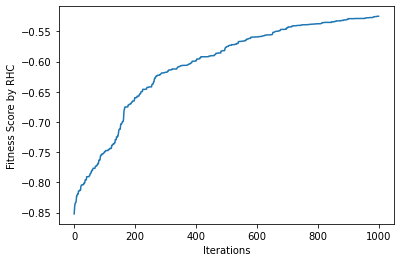

In [512]:
plt.plot(range(len(nn_model.fitness_curve)), nn_model.fitness_curve)
plt.xlabel('Iterations')
plt.ylabel('Fitness Score by RHC')
plt.show

In [517]:
# Define the problem as a neural network
hidden_layers = [2]
nn_model = mlrose.NeuralNetwork(hidden_nodes=hidden_layers, activation='relu',
                                algorithm='simulated_annealing', max_iters=1000,
                                bias=True, is_classifier=True, learning_rate=0.1,
                                early_stopping=True, clip_max=5, max_attempts=100,
                                random_state=1, curve = True)

start_time = time.time()
# Fit the neural network using RHC
nn_model.fit(train_data, train_label)
end_time = time.time()

In [518]:

# Predict labels for train set and assess accuracy
y_train_pred = nn_model.predict(train_data)

y_train_accuracy = accuracy_score(train_label, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model.predict(test_data)

y_test_accuracy = accuracy_score(test_label, y_test_pred)

print('Test accuracy: ', y_test_accuracy)
print('Training time:', end_time - start_time)

Training accuracy:  0.6313645621181263
Test accuracy:  0.6178861788617886
Training time: 0.7534852027893066


<function matplotlib.pyplot.show(close=None, block=None)>

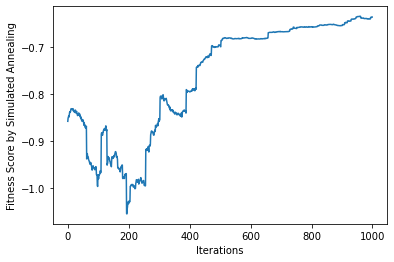

In [519]:
plt.plot(range(len(nn_model.fitness_curve)), nn_model.fitness_curve)
plt.xlabel('Iterations')
plt.ylabel('Fitness Score by Simulated Annealing')
plt.show

In [522]:
# Define the problem as a neural network
hidden_layers = [2]
nn_model = mlrose.NeuralNetwork(hidden_nodes=hidden_layers, activation='relu',
                                algorithm='genetic_alg', max_iters=1000,
                                bias=True, is_classifier=True, learning_rate=0.1,
                                early_stopping=False, clip_max=5, max_attempts=100,
                                random_state=1, curve = True)

start_time = time.time()

nn_model.fit(train_data, train_label)
end_time = time.time()

In [523]:

# Predict labels for train set and assess accuracy
y_train_pred = nn_model.predict(train_data)

y_train_accuracy = accuracy_score(train_label, y_train_pred)

print('Training accuracy: ', y_train_accuracy)

# Predict labels for test set and assess accuracy
y_test_pred = nn_model.predict(test_data)

y_test_accuracy = accuracy_score(test_label, y_test_pred)

print('Test accuracy: ', y_test_accuracy)
print('Training time:', end_time - start_time)

Training accuracy:  0.6496945010183299
Test accuracy:  0.6422764227642277
Training time: 83.69354796409607


<function matplotlib.pyplot.show(close=None, block=None)>

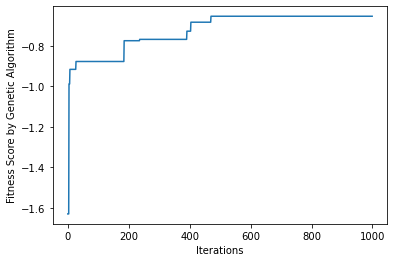

In [524]:
plt.plot(range(len(nn_model.fitness_curve)), nn_model.fitness_curve)
plt.xlabel('Iterations')
plt.ylabel('Fitness Score by Genetic Algorithm')
plt.show